<a href="https://colab.research.google.com/github/ZinTun/Geolocation/blob/main/geolocation_singapore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install geopandas
!pip install pyproj
from pyproj import Proj, transform
from pyproj import CRS
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
CRS("WGS84")

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Read shapefiles

In [24]:
data = gpd.read_file('./sample_data/Subzone_Census2010.shp')
#check attributes of shapefile
data.head()

,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,1,7,MAXWELL,DTSZ07,Y,DOWNTOWN CORE,DT,CENTRAL REGION,CR,5E3B7679E895F85B,2014-05-02,29392.0489,29096.7515,1419.802555,6.366418e+04,"POLYGON ((29537.863 29134.544, 29522.459 29103..."
1,2,1,TANGLIN,ORSZ01,Y,ORCHARD,OR,CENTRAL REGION,CR,3EC2B9D55537C009,2014-05-02,27162.8757,31905.7324,1864.488709,1.675371e+05,"POLYGON ((27418.706 31881.413, 27410.555 31879..."
2,3,2,BOULEVARD,ORSZ02,Y,ORCHARD,OR,CENTRAL REGION,CR,0937E2A5F54A1C53,2014-05-02,27916.9271,31967.0064,4109.231492,4.605504e+05,"POLYGON ((28366.552 31855.703, 28359.125 31841..."
3,4,3,SOMERSET,ORSZ03,Y,ORCHARD,OR,CENTRAL REGION,CR,1C1A0326CE13A8B1,2014-05-02,28626.5610,31494.9048,3039.805140,3.294379e+05,"POLYGON ((28882.434 31681.820, 28882.436 31681..."
4,5,3,PASIR RIS TOWN,PRSZ03,N,PASIR RIS,PR,EAST REGION,ER,37EABA55C9A79089,2014-05-02,40755.8307,39341.7432,5273.291429,1.511612e+06,"POLYGON ((41290.234 39671.558, 41291.480 39656..."


In [25]:
data.shape

(311, 16)

In [26]:
data.REGION_N.value_counts()

CENTRAL REGION       134
WEST REGION           71
NORTH REGION          41
NORTH-EAST REGION     36
EAST REGION           29
Name: REGION_N, dtype: int64

In [27]:
data.PLN_AREA_N.value_counts()

BUKIT MERAH                17
QUEENSTOWN                 15
TOA PAYOH                  12
DOWNTOWN CORE              12
ROCHOR                     10
JURONG EAST                10
ANG MO KIO                 10
WOODLANDS                   9
KALLANG                     9
CLEMENTI                    9
YISHUN                      9
JURONG WEST                 9
SEMBAWANG                   9
BUKIT BATOK                 9
BEDOK                       8
BUKIT TIMAH                 8
PASIR RIS                   7
BUKIT PANJANG               7
CHOA CHU KANG               7
HOUGANG                     7
SENGKANG                    7
NEWTON                      6
PUNGGOL                     6
TUAS                        6
RIVER VALLEY                5
NOVENA                      5
PIONEER                     5
SUNGEI KADUT                5
GEYLANG                     5
MARINE PARADE               5
TAMPINES                    5
PAYA LEBAR                  5
BOON LAY                    4
TANGLIN   

In [28]:
data.crs

<Projected CRS: PROJCS["SVY21",GEOGCS["SVY21[WGS84]",DATUM["WGS_19 ...>
Name: SVY21
Axis Info [cartesian]:
- E[east]: Easting (Meter)
- N[north]: Northing (Meter)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS_84
- Prime Meridian: Greenwich

In [29]:
# Reproject the data to (WGS84: Longitude, Latitude) from (SYV21: X, Y / Easting, Northing)
data_epsg4326 = data.to_crs(epsg=4326)
data_epsg4326.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

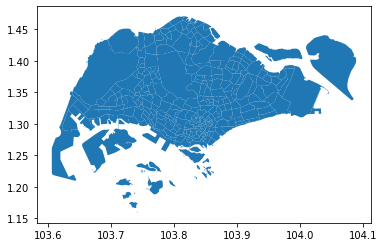

In [30]:
data_epsg4326.plot()

In [31]:
### create data frame for foreword coffee shops in Singapore
points = {'lon': [103.84641649036132,103.79179003028473,103.84734632523997],
        'lat': [1.2991758476816657,1.3096752738430557,1.3221847883703268],
        'address':["28 Orchard Rd, Singapore 238832","31 North Buona Vista Rd, Singapore 275983","18 Jln Tan Tock Seng, Level 4 Centre for Healthcare Innovation Singapore 308443"]
        }
df=[]
df = pd.DataFrame(points, columns = ['lon','lat','address','SUBZONE_N','PLN_AREA_N','REGION_N','OBJECTID'])
### convert dataframe into geodataframe
data_foreword= gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat))

In [32]:
for i, r in data_foreword.iterrows(): # Looping over all points
  point = r.geometry
  for index, row in data_epsg4326.iterrows(): # Looping over all polygons
      if point.within(row.geometry) :
        data_foreword.iloc[i,3:7] = data_epsg4326.iloc[index,[2,5,7,0]]
        break;

In [33]:
data_foreword.head()

,lon,lat,address,SUBZONE_N,PLN_AREA_N,REGION_N,OBJECTID,geometry
0,103.846416,1.299176,"28 Orchard Rd, Singapore 238832",DHOBY GHAUT,MUSEUM,CENTRAL REGION,39,POINT (103.84642 1.29918)
1,103.791790,1.309675,"31 North Buona Vista Rd, Singapore 275983",HOLLAND DRIVE,QUEENSTOWN,CENTRAL REGION,101,POINT (103.79179 1.30968)
2,103.847346,1.322185,"18 Jln Tan Tock Seng, Level 4 Centre for Healt...",MOULMEIN,NOVENA,CENTRAL REGION,310,POINT (103.84735 1.32218)


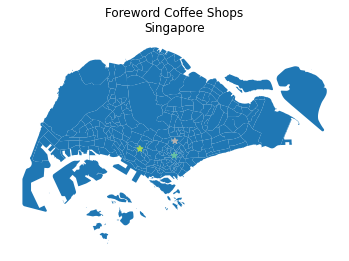

In [34]:
fig, ax = plt.subplots()
data_epsg4326.plot(ax=ax)
data_foreword.plot(categorical=True,
           legend=True,
           figsize=(10, 6),
           markersize=40,
           marker='*',
           cmap="Set2",
           ax=ax)
ax.set_title('Foreword Coffee Shops\nSingapore')
plt.axis('off')
plt.show()
